# Analyse av Titanic-datasettet som allerede finnes i seaborn

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from useful_tools import ModelTester

titanic = sns.load_dataset('titanic', dtype={'age': np.float64})

titanic.adult_male = titanic.adult_male.astype(int)
titanic.alone = titanic.alone.astype(int)

# Slett overflødige kolonner
titanic.drop(['sex', 'sibsp', 'parch', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive', 'age'], axis=1, inplace=True)

# Sett manglende aldre til å være medianen
# median_age = titanic.age.dropna().median()
# if len(titanic.age[titanic.age.isnull()]) > 0:
#     titanic.loc[titanic.age.isnull(), 'age'] = median_age
    
titanic.head()

,survived,pclass,fare,adult_male,alone
0,0,3,7.2500,1,0
1,1,1,71.2833,0,0
2,1,3,7.9250,0,1
3,1,1,53.1000,0,0
4,0,3,8.0500,1,1


## Deler opp i trening- og testsett

Her er `x_train` og `x_test` DataFrames som inneholder data for alle variablene for henholdsvis trenings- og testsettet.
Tilsvarende for `y_train` og `y_test`, bare for responsen (overlevelse)

In [2]:
titanic_vars = titanic.drop(['survived'], axis=1)
titanic_response = titanic[['survived']]

np.random.seed(10)
x_train, x_test, y_train, y_test = train_test_split(titanic_vars, titanic_response, test_size=0.2)

survived = x_train.loc[y_train.survived == 1]
died = x_train.loc[y_train.survived == 0]

tester = ModelTester(x_test, y_test)

## En liten undersøkelse av treningssettet

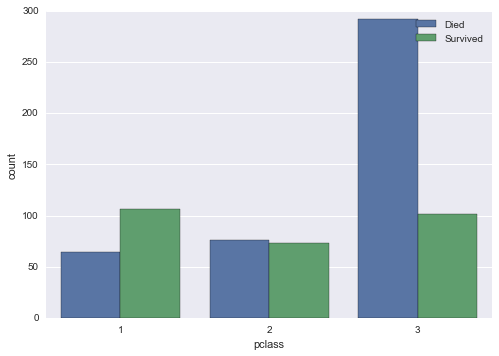

In [3]:
sns.countplot(x_train['pclass'], hue=y_train.survived)
plt.legend(labels=['Died', 'Survived'])
plt.show()

Ut ifra dette, ser det ut til at klassen menneskene var passasjerer på, har innvirkning på om de overlevde eller ikke. Særlig når det gjelder tredje klasse. Vi prøver derfor å predikere overlevelse basert på klassen.

relevant_variables = ['pclass']

tree = DecisionTreeClassifier()
tree.fit(x_train[relevant_variables], y_train)

tester.test_classifier(tree, class_names=['Died', 'Survived'], features=relevant_variables)

# Videre undersøkning av datasettet

## Variablene plottet mot overlevelse

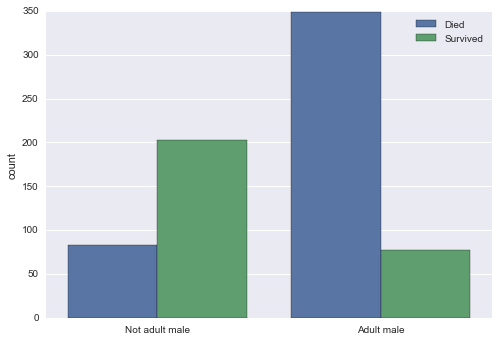

In [4]:
ax = sns.countplot(x_train.adult_male, hue=y_train.survived)
ax.set_xticklabels(['Not adult male', 'Adult male'])
l = plt.legend(labels=['Died', 'Survived'])
plt.xlabel('')
plt.show()

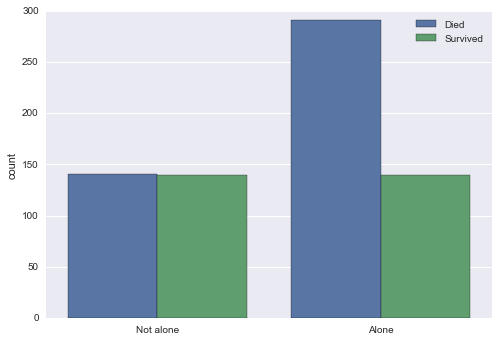

In [5]:
ax = sns.countplot(x_train.alone, hue=y_train.survived)
ax.set_xticklabels(['Not alone', 'Alone'])
l = plt.legend(labels=['Died', 'Survived'])
plt.xlabel('')
plt.show()

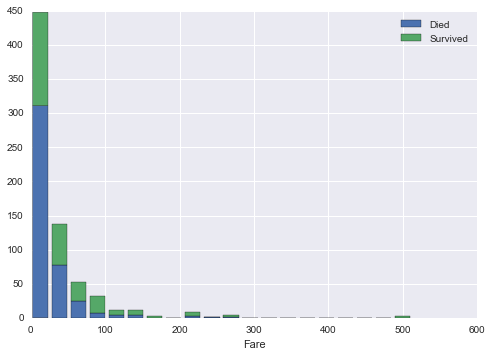

In [6]:
plt.hist([died.fare, survived.fare], stacked=True, bins=20, label=['Died', 'Survived'])
plt.xlabel('Fare')
plt.legend()
plt.show()

## Noen av variablene plottet mot hverandre

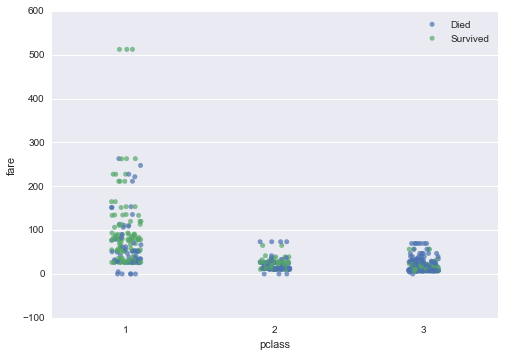

In [7]:
sns.stripplot(x_train.pclass, x_train.fare, jitter=True, alpha=0.7, hue=y_train.survived)
l = plt.legend(labels=['Died', 'Survived'])
plt.show()

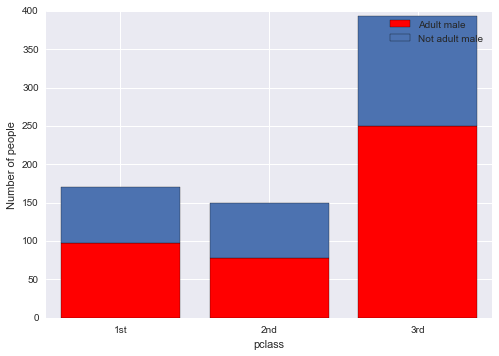

In [8]:
men_per_class = x_train.groupby('pclass').adult_male.sum()
non_men_per_class = x_train.groupby('pclass').size() - men_per_class

plt.bar([1,2,3], men_per_class, color='red', align='center')
plt.bar([1,2,3], non_men_per_class, bottom=men_per_class, align='center')
plt.ylabel('Number of people')
plt.xlabel('pclass')
plt.legend(labels=['Adult male', 'Not adult male'])
plt.xticks([1,2,3], ['1st', '2nd', '3rd'])
plt.show()

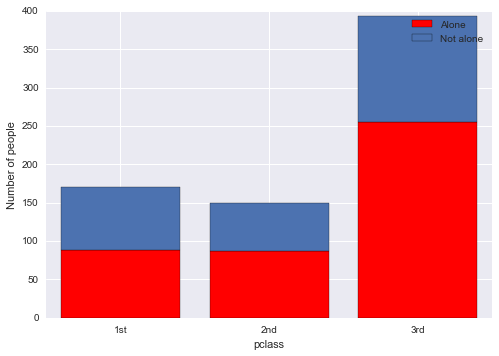

In [9]:
alone = x_train.groupby('pclass').alone.sum()
not_alone = x_train.groupby('pclass').size() - alone

plt.bar([1,2,3], alone, color='red', align='center')
plt.bar([1,2,3], not_alone, bottom=alone, align='center')
plt.ylabel('Number of people')
plt.xlabel('pclass')
plt.legend(labels=['Alone', 'Not alone'])
plt.xticks([1,2,3], ['1st', '2nd', '3rd'])
plt.show()

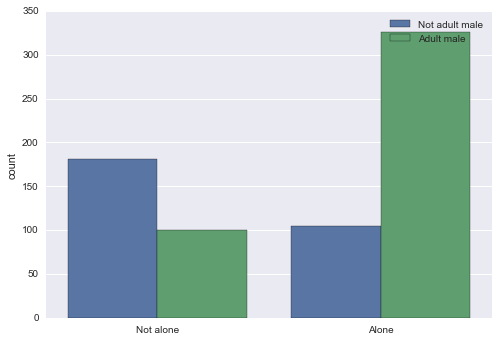

In [10]:
ax = sns.countplot(x_train['alone'], hue=x_train['adult_male'])
ax.set_xticklabels(['Not alone', 'Alone'])
plt.xlabel('')
plt.legend(labels=['Not adult male', 'Adult male'])
plt.show()

## Oppgave 1
Tolk kort plottene ovenfor. Er det noen av de andre variablene som ser viktige ut?

Er det noen som ikke ser viktige ut?

## Oppgave 2: Kan vi gjøre det bedre?
Ut ifra oppgave 1 har du forhåpentligvis en anelse om hvilke variabler som er viktige.
Prøv forskjellige kombinasjoner av variablene, og se hvor høy du kan få accuracy.

Variablene velger du ved å skrive de inn i listen `relevant_variables`

Confusion matrix, without normalization


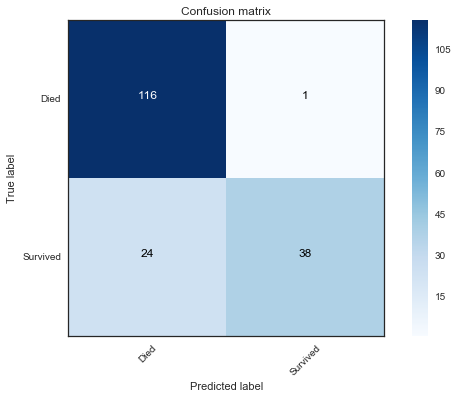

Accuracy:  86.0335195531 %


In [11]:
# Legg til variable i lista
# Spoiler: pclass og adult_male gir accuracy på 86 %
#relevant_variables = ['pclass', 'adult_male', 'alone', 'fare']
relevant_variables = ['pclass', 'adult_male']

tree = DecisionTreeClassifier()
tree.fit(x_train[relevant_variables], y_train)

tester.test_classifier(tree, class_names=['Died', 'Survived'], features=relevant_variables)